In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/TechAxis/customer_churn_data.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.shape

(1000, 10)

In [6]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,297
TotalCharges,0
TechSupport,0
Churn,0


In [7]:
# Checking NULL value

In [8]:
df.isna().sum().sum()

np.int64(297)

In [9]:
df["InternetService"]

,InternetService
0,Fiber Optic
1,Fiber Optic
2,Fiber Optic
3,DSL
4,NaN
...,...
995,Fiber Optic
996,NaN
997,Fiber Optic
998,NaN


In [10]:
# Replacing Na with "No Internet Service"

In [11]:
df["InternetService"] = df["InternetService"].fillna("No Internet Service")

In [12]:
df["InternetService"]

,InternetService
0,Fiber Optic
1,Fiber Optic
2,Fiber Optic
3,DSL
4,No Internet Service
...,...
995,Fiber Optic
996,No Internet Service
997,Fiber Optic
998,No Internet Service


In [13]:
df.isna().sum().sum()

np.int64(0)

No any null values available now!

In [14]:
# Check duplicate value

In [15]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [16]:
df.duplicated().sum()

np.int64(0)

No duplicate values

In [17]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [18]:
numeric_columns_data = df.select_dtypes(include=["number"])

In [19]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [20]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,No Internet Service,2208.32,No,Yes


Churn
Yes    883
No     117
Name: count, dtype: int64


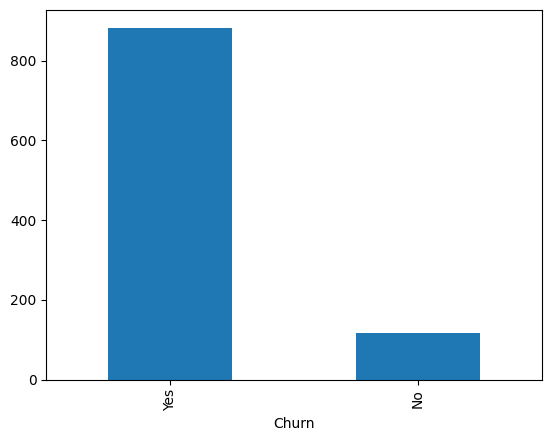

In [21]:
df["Churn"].value_counts().plot(kind="bar")
print(df["Churn"].value_counts())

In [22]:
df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
No,62.54641
Yes,75.96077


In [23]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [24]:
df.groupby("Churn")["Tenure"].mean()

,Tenure
Churn,
No,30.264957
Yes,17.476784


In [25]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,No Internet Service,2208.32,No,Yes


In [26]:
df.groupby("Churn")["Age"].mean()

,Age
Churn,
No,43.487179
Yes,44.831257


In [27]:
import matplotlib.pyplot as plt

In [28]:
df.groupby("ContractType")["MonthlyCharges"].mean()

,MonthlyCharges
ContractType,
Month-to-Month,75.909198
One-Year,73.822803
Two-Year,71.334500


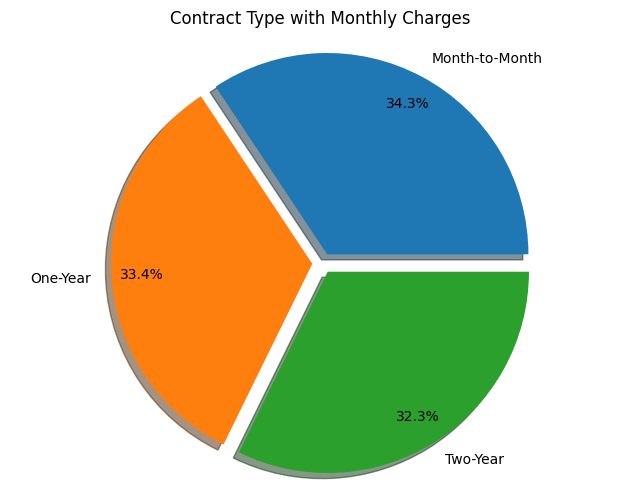

In [29]:
plt.figure(figsize=(8, 6))
explode = 0.05,0.05,0.05
plt.pie(
    df.groupby("ContractType")["MonthlyCharges"].mean(),
    labels=df.groupby("ContractType")["MonthlyCharges"].mean().index,
    autopct="%1.1f%%",
    pctdistance=0.85,
    explode = explode,
    shadow=True
)
plt.title("Contract Type with Monthly Charges")
plt.axis("equal")
plt.show()

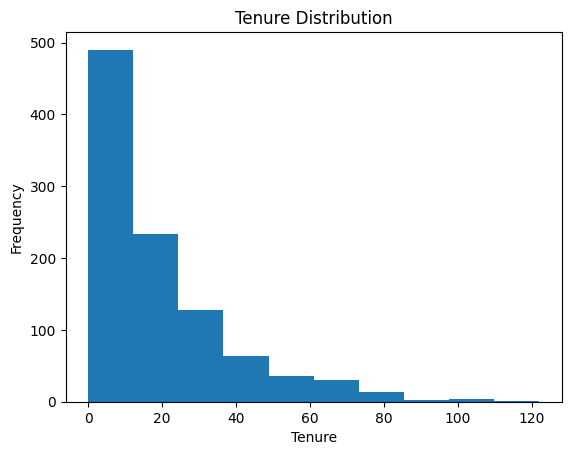

In [30]:
plt.hist(df["Tenure"])
plt.title("Tenure Distribution")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

## **Feature Engineering**

In [31]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [32]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,No Internet Service,2208.32,No,Yes


In [33]:
y = df[["Churn"]]
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [34]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [35]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [36]:
# Converting Gender into numeric value (0,1)
X["Gender"] = X["Gender"].apply(lambda x:1 if x=="Female" else 0)

/tmp/ipython-input-518857957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x:1 if x=="Female" else 0)


In [37]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [38]:
y["Churn"] = y["Churn"].apply(lambda x:1 if x=="Yes" else 0)

/tmp/ipython-input-111839969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x:1 if x=="Yes" else 0)


In [39]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


## **Machine Learning**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
import joblib

In [47]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [48]:
X_test = scaler.fit_transform(X_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
def modelperformance(predictions):
  print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [51]:
# Using Logistic Regrssion model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [52]:
log_model = LogisticRegression()

In [53]:
import warnings

warnings.filterwarnings("ignore")

In [54]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [55]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [59]:
y_pred = log_model.predict(X_test)

In [60]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [61]:
# Using KNeighbors model
from sklearn.neighbors import KNeighborsClassifier

In [62]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform", "distance"]
}

In [63]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [64]:
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [65]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [66]:
y_pred = gridkn.predict(X_test)

In [67]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [68]:
# Using Support Vector Machine
from sklearn.svm import SVC

In [69]:
svm = SVC()

In [70]:
param_grid = {
    "C": [0.01,0.1,0.5,1],
    "kernel": ["linear", "rbf", "poly"]
}

In [71]:
gridsvc = GridSearchCV(svm, param_grid, cv=5)

In [72]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [73]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [74]:
y_pred = gridsvc.predict(X_test)

In [75]:
modelperformance(y_pred)

Accuracy score on model is 0.885


In [76]:
# Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [78]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [79]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [80]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [81]:
y_pred = grid_tree.predict(X_test)

In [82]:
modelperformance(y_pred)

Accuracy score on model is 0.865


In [83]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc_model = RandomForestClassifier()

In [85]:
param_grid = {
    "n_estimators": [32,64,128,256],
    "criterion": ["gini", "entropy"],
    "max_features": [2,3,4],
    "bootstrap": [True, False]
}

In [86]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [88]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [89]:
grid_rfc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 3,
 'n_estimators': 64}

In [90]:
y_pred = grid_rfc.predict(X_test)

In [91]:
modelperformance(y_pred)

Accuracy score on model is 0.865


In [92]:
best_model = gridsvc.best_estimator_

In [93]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [95]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')

### **Therefore we choose Support Vector Machine as the best model.**